In [2]:
import numpy as np
import seaborn as sns
import numpy.random as rd
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math
import scipy.stats as st

$x_1, \ldots, x_n \sim Bin(m, p)$. 
* Показать, что $p$ попадает в доверительный интервал с нужной вероятностью.
* Исследовать зависимость ширины доверительного интервала для параметра распределения $p$ от объема выборки.

На лекции говорили о том, как строить асимптотические доверительные интервалы с помощью ЦПТ. Для биноминального распределения имеем $Bin(m, p) \sim N(mp, mpq)$, то есть
$$L(\sqrt{m}\frac{\overline{x}-mp}{\sqrt{mp(1-p)}}) \rightarrow N(0,1)$$
и можем взять центральную статистику 
$$ g = \frac{\overline{x}-mp}{\sqrt{p(1-p)}}$$

Рассмотрим доверительный интервал с $\gamma = 0.95$. Тогда с этой вероятностью
$$ -z_k< \frac{\overline{x}-mp}{\sqrt{p(1-p)}}<z_k$$
где $z_k = 1.96$ (информация из таблички).

Саму величину $p$ будем оценивать через матожидание: $E\xi=mp \Rightarrow p = \frac{\overline{x}}{m}$.

$$ -z_k< \frac{\overline{x}-mp}{\sqrt{\frac{\overline{x}}{m}(1-\frac{\overline{x}}{m})}}<z_k$$
В конечном итоге доверительный интервал:
$$\frac{1}{m}(\overline{x} - z_k \sqrt{\frac{\overline{x}}{m}(1-\frac{\overline{x}}{m})} < p < \frac{1}{m}(\overline{x} + z_k \sqrt{\frac{\overline{x}}{m}(1-\frac{\overline{x}}{m})} )$$

In [55]:
#cmap = plt.get_cmap("tab10").colors

#plt.figure(figsize=(15, 15))

n = 10000 # количество выборок
m = 100000 # параметр Bin
z = 100000 # размер выборки
p = 0.5
tmp = []
for k in range(n):
    sample = st.binom(n=m, p=p).rvs(size=z)
    a = sample.mean()
    b = sample.std()
    #print(a/m)
    tmp.append((a-m*p)/(np.sqrt(a/m*(1-a/m))))
#print(tmp)
counter = 0
for i in range(n):
    if -1.96 < tmp[i] < 1.96:
        counter +=1
print("Вероятность попадания в доверительный интервал:", counter/n)

Вероятность попадания в доверительный интервал: 0.9506


Нас этот результат вполне устраивает.

Теперь посмотрим на зависимоть ширины доверительного интервала от объема выборки. Ширина, очевидно, это просто $\overline{x}/m$.

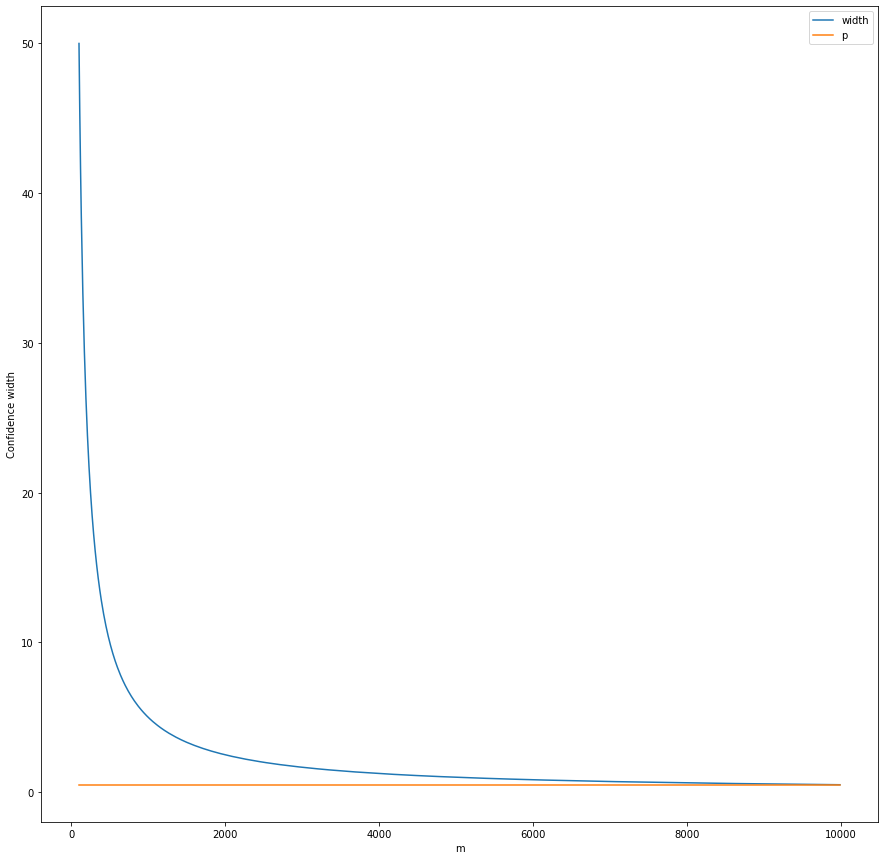

In [67]:
plt.figure(figsize=(15, 15))
m = 10000
y = []
for i in range(100, m, 10):
    sample = st.binom(n=m, p=p).rvs(size=m)
    y.append(sample.mean()/i)
#print(y)
plt.plot(range(100, m, 10), y, label="width")
plt.plot(range(100, m, 10), [0.5 for i in range(100, m, 10)], label="p")
plt.legend()
plt.xlabel("m")
plt.ylabel("Confidence width")

None

Видим, что ширина стремится к $p$ при увеличении $m$.

In [24]:
aa = [118, 119, 121, 122, 123]
for a in aa:
    c = 6.68 *(a-120)/5
    print("$a =$", a, ";, $P=$", -st.norm.cdf(-1.96-c) + st.norm.cdf(1.96-c))

$a =$ 118 ;, $P=$ 0.2382305772598008 
$a =$ 119 ;, $P=$ 0.7331958473896388 
$a =$ 121 ;, $P=$ 0.7331958473896388 
$a =$ 122 ;, $P=$ 0.23823057725980085 
$a =$ 123 ;, $P=$ 0.02027999849766412 
